## My Capstone Project - Topic TBD

The project will use Foursquare API and Machine Learning techniques to... TBD.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

# Web Request and scaping libraries
import urllib.request
from bs4 import BeautifulSoup

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import json

#!pip install bs4
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
#from bs4 import BeautifulSoup
#from urllib.request import urlopen


# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Imports from Math Library
from math import sin, cos, sqrt, atan2, radians, degrees, asin

# Import from geopy
import geopy
from geopy.distance import geodesic

!conda install -c districtdatalabs yellowbrick
from sklearn.cluster import KMeans # import k-means from clustering stage
from sklearn.neighbors import DistanceMetric #various distance metrics
from sklearn.datasets import make_blobs
from sklearn.metrics import davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer


# K-Elbow
from scipy.spatial.distance import cdist 
import scipy.cluster.hierarchy as shc

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium import plugins


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-OpenCE

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.5.30          |   py37h89c1867_0         141 KB  conda-forge
    geographiclib-1.52         |     pyhd8ed1ab_0          35 KB  conda-forge
    geopy-2.2.0                |     pyhd8ed1ab_0          67 KB  conda-forge
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    python_abi-3.7             |          2_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.4 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.52-pyhd8ed1ab_0
  geopy              conda-forge/noarch::geopy-2.2.0-pyhd8ed1ab_0
  py

In [2]:
# function that extracts the Foursquare category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [3]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [4]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [5]:
neighborhoods_data = newyork_data['features']

In [6]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [7]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [8]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


Make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="geo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of New York City, NY are 40.7127281, -74.0060152.


In [12]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [13]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [14]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="geo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Manhattan, NY are 40.7896239, -73.9598939.


In [15]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [16]:
#calculate a distance matrix. convert lat/long to radians and then back to km
dist = DistanceMetric.get_metric('haversine')
neighborhoods_distance = pd.DataFrame(dist.pairwise(np.radians(manhattan_data[['Latitude','Longitude']]).to_numpy())*6373,  columns=manhattan_data.Neighborhood.unique(), index=manhattan_data.Neighborhood.unique())
neighborhoods_distance.head()

,Marble Hill,Chinatown,Washington Heights,Inwood,Hamilton Heights,Manhattanville,Central Harlem,East Harlem,Upper East Side,Yorkville,Lenox Hill,Roosevelt Island,Upper West Side,Lincoln Square,Clinton,Midtown,Murray Hill,Chelsea,Greenwich Village,East Village,Lower East Side,Tribeca,Little Italy,Soho,West Village,Manhattan Valley,Morningside Heights,Gramercy,Battery Park City,Financial District,Carnegie Hill,Noho,Civic Center,Midtown South,Sutton Place,Turtle Bay,Tudor City,Stuyvesant Town,Flatiron,Hudson Yards
Marble Hill,0.000000,19.235539,3.519773,1.326725,6.742834,7.709010,7.273141,9.792020,11.982947,11.605091,12.725608,13.130110,11.357413,13.069787,14.913657,14.813987,15.360499,16.668702,18.260101,17.603738,18.621063,19.190680,18.949141,18.768055,17.735781,9.902385,8.843474,16.603065,20.378035,20.643140,11.039296,18.264934,19.637814,15.684736,13.677795,14.658102,15.293870,17.046744,16.657934,15.314701
Chinatown,19.235539,0.000000,15.910507,17.998692,12.584918,11.690107,11.963113,9.511606,7.257318,7.797294,6.557671,6.422889,8.143265,6.485295,4.839033,4.474123,3.876035,3.247320,1.345164,1.697777,1.154722,1.530892,0.484681,0.906829,2.320852,9.431089,10.589588,2.636431,1.948192,1.674802,8.221559,0.982407,0.939843,3.688447,5.602054,4.629208,3.987217,2.415469,2.690295,4.591222
Washington Heights,3.519773,15.910507,0.000000,2.196236,3.326478,4.254435,4.031233,6.663450,8.712511,8.494091,9.501520,10.035378,7.905129,9.624033,11.463370,11.450974,12.039838,13.230346,14.878847,14.316910,15.368682,15.777368,15.599513,15.395264,14.309296,6.495405,5.385984,13.295629,16.963322,17.262398,7.821463,14.952674,16.260506,12.300050,10.435301,11.406298,12.029706,13.807139,13.286987,11.855699
Inwood,1.326725,17.998692,2.196236,0.000000,5.457178,6.413302,6.042070,8.610430,10.759270,10.436172,11.519821,11.971081,10.066166,11.782091,13.624869,13.559674,14.122734,15.385442,17.000604,16.380634,17.411864,17.918532,17.702495,17.512148,16.457765,8.626704,7.548192,15.371339,19.105635,19.384731,9.831909,17.032505,18.380442,14.422613,12.467005,13.445268,14.077213,15.841059,15.401738,14.022383
Hamilton Heights,6.742834,12.584918,3.326478,5.457178,0.000000,0.984994,1.008541,3.518259,5.412442,5.307233,6.220455,6.834622,4.614871,6.327269,8.170978,8.124586,8.716221,9.928729,11.555075,10.998063,12.057805,12.462966,12.273054,12.070347,11.000672,3.172736,2.107889,9.973384,13.649828,13.939069,4.561622,11.628774,12.936398,8.976111,7.139674,8.103199,8.720487,10.502843,9.961432,8.572060


In [17]:
CLIENT_ID = 'VN25CXKUDPGIPDDN1W1SKWLYUFJMSSCC2ZLZD1PSGPE3L13P' # your Foursquare ID
CLIENT_SECRET = 'VILSAWLYMRYFH1BQKVIZRL45NXJ1BPM4DINT43IDNCTGV5C3' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value
radius = 500 #Radius parameter to be iterated using a distance function
category = ''

In [18]:
# create the API request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude,
    category,
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=VN25CXKUDPGIPDDN1W1SKWLYUFJMSSCC2ZLZD1PSGPE3L13P&client_secret=VILSAWLYMRYFH1BQKVIZRL45NXJ1BPM4DINT43IDNCTGV5C3&v=20180605&ll=40.7896239,-73.9598939&categoryId=&radius=500&limit=100'

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6112a0fadd75c534b01915eb'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Central Park',
  'headerFullLocation': 'Central Park, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 30,
  'suggestedBounds': {'ne': {'lat': 40.794123904500005,
    'lng': -73.95396136384342},
   'sw': {'lat': 40.7851238955, 'lng': -73.96582643615658}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a78425df964a52053e51fe3',
       'name': 'Central Park Tennis Center',
       'location': {'address': 'Central Park West at 96th St',
        'lat': 40.78931319964619,
        'lng': -73.96186241658044,
        'labeledLatLngs': [{'label': 'disp

In [20]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Central Park Tennis Center,Tennis Court,40.789313,-73.961862
1,North Meadow Recreation Center,Recreation Center,40.791216,-73.959661
2,East Meadow,Field,40.790160,-73.955498
3,Oldest Tree in Central Park,Park,40.789188,-73.957867
4,Central Park - 96th Street Playground,Playground,40.787813,-73.956257
5,Central Park - Wild West Playground,Playground,40.789715,-73.965471
6,Central Park - 99th & 5th Ave,Park,40.788791,-73.955232
7,North Meadow Field 2,Baseball Field,40.792231,-73.961087
8,North Meadow Field 9,Baseball Field,40.792284,-73.956348
9,Robert Bendheim Playground,Playground,40.790254,-73.954150


In [21]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[lat, lng], zoom_start=13)

# add markers to map
for lat, lng, label in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [22]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
def getNearbyVenues(names, latitudes, longitudes, category, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            category,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [24]:
# type your answer here
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude'],
                                   category = '',
                                   radius=500
                                  )

Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [25]:
manhattan_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Battery Park City,91,91,91,91,91,91
Carnegie Hill,94,94,94,94,94,94
Central Harlem,46,46,46,46,46,46
Chelsea,100,100,100,100,100,100
Chinatown,100,100,100,100,100,100
Civic Center,100,100,100,100,100,100
Clinton,100,100,100,100,100,100
East Harlem,40,40,40,40,40,40
East Village,100,100,100,100,100,100


In [26]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

There are 337 uniques categories.


In [27]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

,Neighborhood,Accessories Store,Acupuncturist,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Peruvian Roast Chicken Joint,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,S

In [28]:
manhattan_onehot.shape

(3273, 338)

In [29]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped.head()

,Neighborhood,Accessories Store,Acupuncturist,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,College Theater,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Creperie,Cuban Restaurant,Cultural Center,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Dentist's Office,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Escape Room,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indoor Play Area,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundry Service,Leather Goods Store,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Peruvian Roast Chicken Joint,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,S

In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Coffee Shop,Clothing Store,Memorial Site,Gym,Shopping Mall,Boat or Ferry,Sandwich Place,Plaza
1,Carnegie Hill,Coffee Shop,Café,Wine Shop,Pizza Place,Gym / Fitness Center,Gym,French Restaurant,Yoga Studio,Bookstore,Bar
2,Central Harlem,African Restaurant,Public Art,Bar,French Restaurant,Fried Chicken Joint,American Restaurant,Art Gallery,Gym / Fitness Center,Chinese Restaurant,Seafood Restaurant
3,Chelsea,Coffee Shop,Bakery,American Restaurant,Art Gallery,French Restaurant,Wine Shop,Hotel,Ice Cream Shop,Italian Restaurant,Market
4,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Dessert Shop,Optical Shop,Hotpot Restaurant,Salon / Barbershop,Asian Restaurant,Boutique


In [32]:
#from sklearn import preprocessing

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)
#col = manhattan_grouped_clustering.columns
#est = preprocessing.MinMaxScaler()
#Xt = est.fit_transform(manhattan_grouped_clustering)
#manhattan_grouped_clustering= pd.DataFrame(Xt, columns = col)
#manhattan_grouped_clustering

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


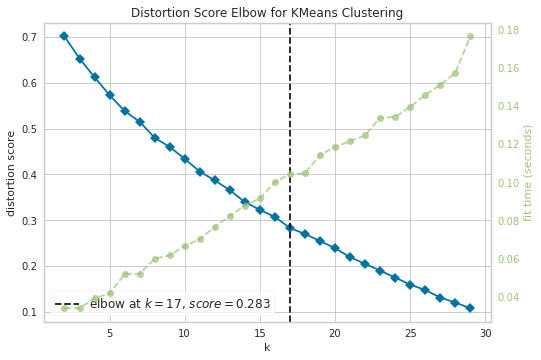

17
0.283126517850414


In [33]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=40)
visualizer = KElbowVisualizer(model, k=(2,30))

visualizer.fit(manhattan_grouped_clustering)        # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
print(visualizer.elbow_value_)
print(visualizer.elbow_score_)

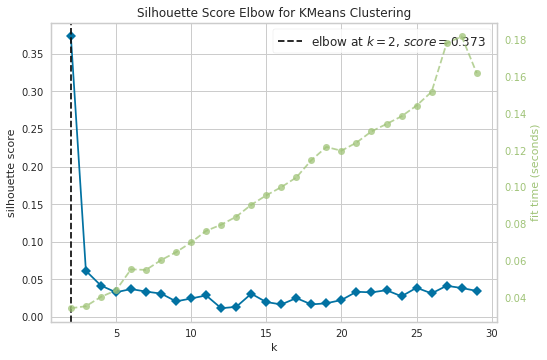

2
0.3729748849845795


In [34]:
# Silhouette Score for K means

model = KMeans(random_state=40)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), metric='silhouette', timings= True)
visualizer.fit(manhattan_grouped_clustering)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure
print(visualizer.elbow_value_)
print(visualizer.elbow_score_)

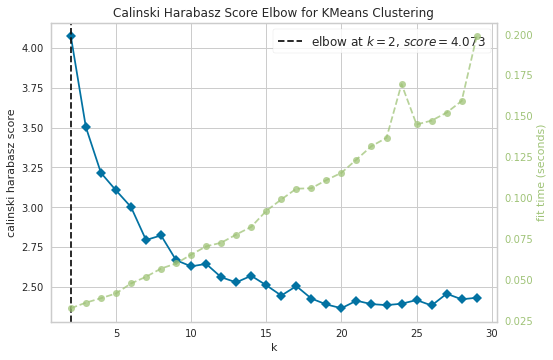

2
4.072927206680963


In [35]:
# Calinski Harabasz Score for K means

model = KMeans(random_state=40)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), metric='calinski_harabasz', timings= True)
visualizer.fit(manhattan_grouped_clustering)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure
print(visualizer.elbow_value_)
print(visualizer.elbow_score_)

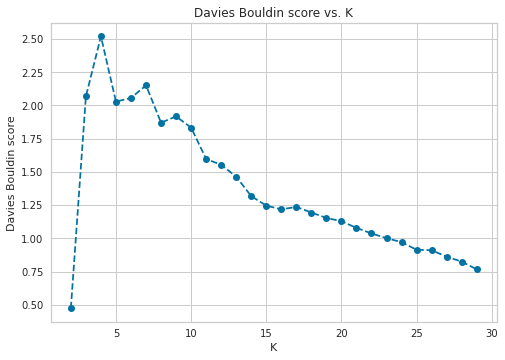

In [36]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score

def get_kmeans_score(data, center):
    
    #instantiate kmeans
    kmeans = KMeans(n_clusters=center, random_state=40)
    # Then fit the model to your data using the fit method
    model = kmeans.fit_predict(manhattan_grouped_clustering)
    
    # Calculate Davies Bouldin score
    score = davies_bouldin_score(manhattan_grouped_clustering, model)
    
    return score

scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(manhattan_grouped_clustering, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


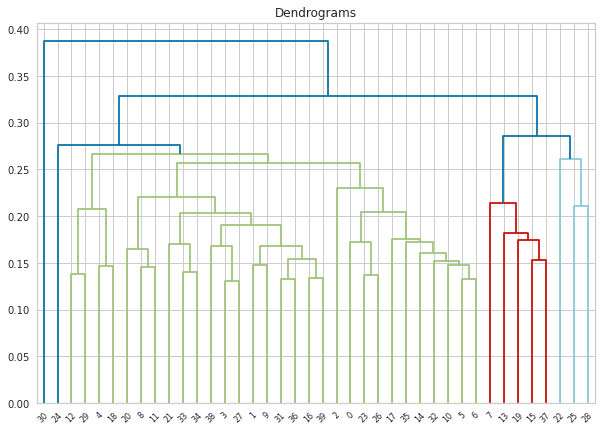

In [37]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot

pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(manhattan_grouped_clustering, method='ward'))

In [38]:
#s = manhattan_grouped_clustering.astype(bool).sum(axis=0)
#manhattan_grouped_clustering[s.sort_values(ascending=False)]
sorted_venuetypes = manhattan_grouped_clustering[manhattan_grouped_clustering.sum(0).sort_values(ascending=False).index]
sorted_venuetypes.head()

,Coffee Shop,Italian Restaurant,Park,Pizza Place,Café,American Restaurant,Bakery,Bar,Mexican Restaurant,Hotel,Gym,Cocktail Bar,Gym / Fitness Center,Chinese Restaurant,Sandwich Place,Sushi Restaurant,Deli / Bodega,French Restaurant,Wine Shop,Seafood Restaurant,Clothing Store,Spa,Japanese Restaurant,Ice Cream Shop,Grocery Store,Cosmetics Shop,Thai Restaurant,Burger Joint,Wine Bar,Yoga Studio,Indian Restaurant,Steakhouse,Dessert Shop,Juice Bar,Art Gallery,Mediterranean Restaurant,Bookstore,Restaurant,Playground,Korean Restaurant,Diner,Bagel Shop,New American Restaurant,Greek Restaurant,Boutique,Plaza,Vietnamese Restaurant,Theater,Salad Place,Pharmacy,Ramen Restaurant,Farmers Market,Dog Run,Salon / Barbershop,Gourmet Shop,Spanish Restaurant,Gift Shop,Latin American Restaurant,Vegetarian / Vegan Restaurant,Caribbean Restaurant,Pet Store,Cycle Studio,Lounge,Women's Store,Optical Shop,Supermarket,Taco Place,Liquor Store,Asian Restaurant,Donut Shop,Pub,Furniture / Home Store,Scenic Lookout,Sporting Goods Shop,Tapas Restaurant,Food Truck,Shoe Store,Bubble Tea Shop,Beer Bar,Cuban Restaurant,Fried Chicken Joint,Bank,Hotel Bar,Speakeasy,Performing Arts Venue,Bistro,Department Store,Boat or Ferry,Gastropub,Garden,Roof Deck,Pilates Studio,Lingerie Store,Breakfast Spot,Jazz Club,Historic Site,Exhibit,Flower Shop,Falafel Restaurant,Gas Station,Food & Drink Shop,Ethiopian Restaurant,Tennis Court,Monument / Landmark,Dance Studio,BBQ Joint,Fountain,Men's Store,Event Space,Boxing Gym,Big Box Store,Museum,Tea Room,Residential Building (Apartment / Condo),School,Smoke Shop,Supplement Shop,African Restaurant,Food Court,Heliport,Fast Food Restaurant,Frozen Yogurt Shop,Peruvian Restaurant,Building,Pet Service,Paper / Office Supplies Store,Movie Theater,Electronics Store,Cupcake Shop,Argentinian Restaurant,Karaoke Bar,Middle Eastern Restaurant,Indie Movie Theater,Health & Beauty Service,Rock Club,Public Art,Outdoor Sculpture,Video Game Store,Kids Store,Harbor / Marina,Hawaiian Restaurant,Tennis Stadium,Discount Store,Noodle House,Cheese Shop,Dim Sum Restaurant,Turkish Restaurant,Concert Hall,Hotpot Restaurant,Toy / Game Store,Bus Line,History Museum,Nightclub,Soccer Field,Comedy Club,Shipping Store,Burrito Place,Health Food Store,Thrift / Vintage Store,Trail,Southern / Soul Food Restaurant,Beer Garden,Market,Music Venue,Convenience Store,Pet Café,Indie Theater,Dumpling Restaurant,Japanese Curry Restaurant,Israeli Restaurant,Szechuan Restaurant,Wings Joint,Australian Restaurant,Miscellaneous Shop,Snack Place,Massage Studio,Malay Restaurant,Filipino Restaurant,Bus Station,Adult Boutique,Metro Station,Dry Cleaner,Outdoors & Recreation,Mobile Phone Shop,Waterfront,Shopping Mall,Gaming Cafe,Bus Stop,Memorial Site,Jewish Restaurant,Shanghai Restaurant,Pool,Library,Bike Rental / Bike Share,Dive Bar,Art Museum,Nail Salon,Climbing Gym,Bike Trail,Sports Bar,Doctor's Office,Martial Arts School,Hot Dog Joint,Creperie,Veterinarian,Chocolate Shop,Candy Store,Flea Market,Tattoo Parlor,Jewelry Store,Club House,Office,Organic Grocery,Brazilian Restaurant,Record Shop,Beer Store,Sake Bar,Tailor Shop,Community Center,College Cafeteria,Kebab Restaurant,Camera Store,Pedestrian Plaza,Music School,Bridge,Accessories Store,Cafeteria,Basketball Court,Skate Park,Tiki Bar,Kosher Restaurant,Athletics & Sports,Whisky Bar,Modern European Restaurant,Poke Place,Bridal Shop,Irish Pub,Arts & Crafts Store,Used Bookstore,Street Art,North Indian Restaurant,Newsstand,Taiwanese Restaurant,Leather Goods Store,Lebanese Restaurant,Strip Club,Austrian Restaurant,Udon Restaurant,Sports Club,Other Great Outdoors,Butcher,Paella Restaurant,Bike Shop,Fish Market,Hostel,Hardware Store,Garden Center,German Restaurant,Eastern European Restaurant,Hill,Hobby Shop,Auto Workshop,Moving Target,Intersection,Empanada Restaurant,Hookah Bar,Stables,Post Office,Rental Car Location,Rest Area,Auditorium,Cooking School,Tree,High School,Stationery Store,Gym Pool,Volleyball Court,Mini Golf,Social Club,South Indian Res

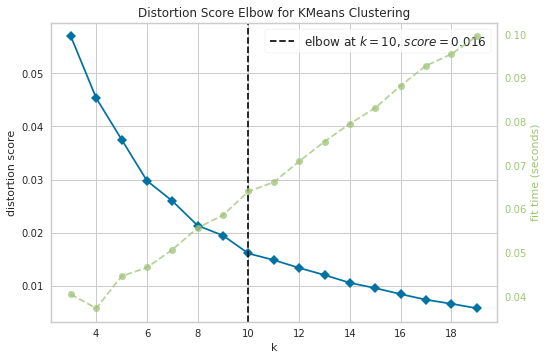

10
0.016087370114234577


In [39]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=20, init='k-means++')
visualizer = KElbowVisualizer(model, k=(3,20))

df=sorted_venuetypes.iloc[: , :4]

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data
print(visualizer.elbow_value_)
print(visualizer.elbow_score_)

In [40]:
column_names = {'Features', 'K_distort', 'Score_distort', 'K_silhouet', 'Score_silhouet', 'K_calinski_har', 'Score_calinski_har'}

elbows = pd.DataFrame(columns = column_names)
elbows

,K_calinski_har,Score_calinski_har,K_distort,K_silhouet,Score_silhouet,Features,Score_distort


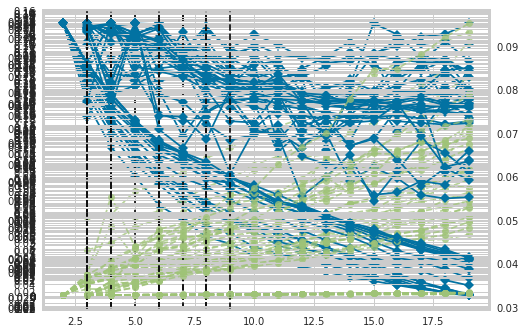

In [41]:
# of features vs optimal silhouette
#metrics ={'distortion','silhouette','calinski_harabasz'}

for i in range(4, 20, 1):
    df = sorted_venuetypes.iloc[: , :i]
    
    model = KMeans(random_state=20, init='k-means++')
    visualizer = KElbowVisualizer(model, k=(2,20))
    visualizer.fit(df)
    k_distortion=visualizer.elbow_value_
    score_distortion=visualizer.elbow_score_

    model = KMeans(random_state=20, init='k-means++')
    visualizer = KElbowVisualizer(model, k=(3,20), metric='silhouette')
    visualizer.fit(df)
    k_silhouette=visualizer.elbow_value_
    score_silhouette=visualizer.elbow_score_   

    model = KMeans(random_state=20, init='k-means++')
    visualizer = KElbowVisualizer(model, k=(3,20), metric='calinski_harabasz')
    visualizer.fit(df)
    k_calinski_harabasz=visualizer.elbow_value_
    score_calinski_harabasz=visualizer.elbow_score_          

    elbows = elbows.append({'Features': i,
                            'K_distort': k_distortion,
                            'Score_distort': score_distortion,                               
                            'K_silhouet': k_silhouette,
                            'Score_silhouet': score_silhouette,                              
                            'K_calinski_har': k_calinski_harabasz,
                            'Score_calinski_har': score_calinski_harabasz}, ignore_index=True)

In [42]:
elbows

,K_calinski_har,Score_calinski_har,K_distort,K_silhouet,Score_silhouet,Features,Score_distort
0,3.0,17.229567,8.0,6.0,0.310065,4.0,0.021328
1,3.0,14.013147,8.0,4.0,0.237331,5.0,0.031596
2,3.0,11.890817,8.0,5.0,0.203719,6.0,0.042614
3,3.0,10.409088,8.0,4.0,0.179753,7.0,0.051222
4,3.0,10.760289,7.0,6.0,0.183151,8.0,0.068703
5,3.0,9.427775,6.0,3.0,0.180183,9.0,0.088742
6,3.0,9.014517,6.0,3.0,0.177865,10.0,0.103274
7,3.0,8.283799,7.0,3.0,0.153175,11.0,0.105624
8,3.0,7.843251,6.0,3.0,0.148287,12.0,0.123887
9,3.0,7.685555,8.0,4.0,0.120905,13.0,0.114565


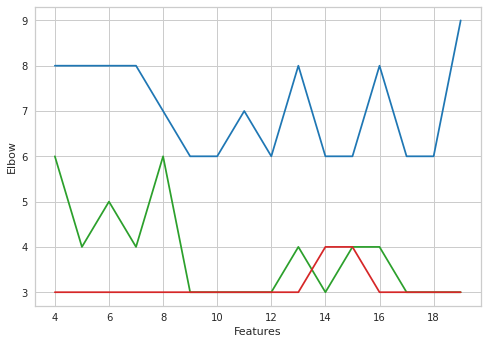

In [43]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Features')
ax1.set_ylabel('Elbow')

color = 'tab:green'
ax1.plot(elbows['Features'], elbows['K_silhouet'], color=color)

color = 'tab:blue'
ax1.plot(elbows['Features'], elbows['K_distort'], color=color)

color = 'tab:red'
ax1.plot(elbows['Features'], elbows['K_calinski_har'], color=color)


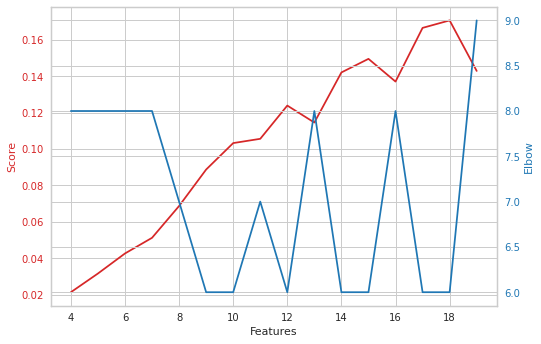

In [44]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Features')
ax1.set_ylabel('Score', color=color)
ax1.plot(elbows['Features'], elbows['Score_distort'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Elbow', color=color)  # we already handled the x-label with ax1
ax2.plot(elbows['Features'], elbows['K_distort'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


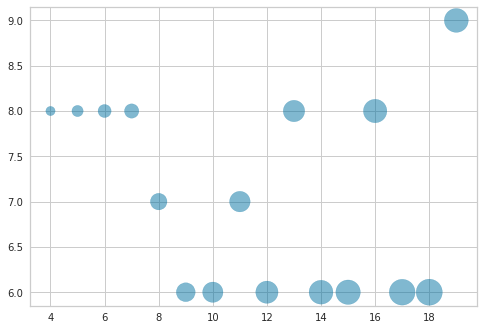

In [45]:
elbows['Features'], elbows['Score_distort']
x = elbows['Features']
y = elbows['K_distort']
area = (4000 * elbows['Score_distort'])

plt.scatter(x, y, s=area, alpha=0.5)
plt.show()

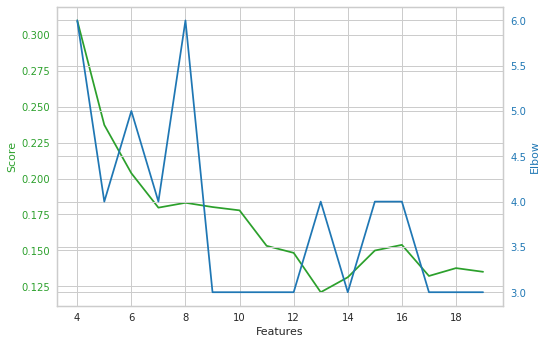

In [46]:
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Features')
ax1.set_ylabel('Score', color=color)
ax1.plot(elbows['Features'], elbows['Score_silhouet'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Elbow', color=color)  # we already handled the x-label with ax1
ax2.plot(elbows['Features'], elbows['K_silhouet'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

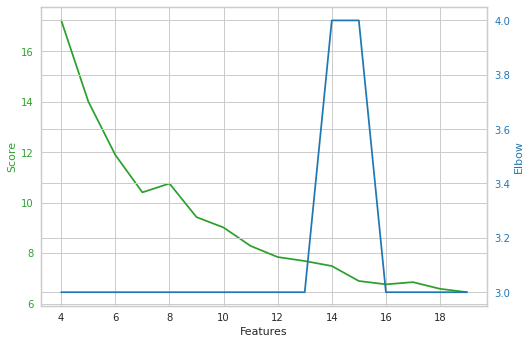

In [47]:
fig, ax1 = plt.subplots()

color = 'tab:green'
ax1.set_xlabel('Features')
ax1.set_ylabel('Score', color=color)
ax1.plot(elbows['Features'], elbows['Score_calinski_har'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Elbow', color=color)  # we already handled the x-label with ax1
ax2.plot(elbows['Features'], elbows['K_calinski_har'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

In [48]:
# set number of clusters
kclusters = 5

# run k-means clustering
model = KMeans(random_state=20, init='k-means++')
df = sorted_venuetypes.iloc[: , :11]

kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=20).fit(df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 3, 4, 4, 4, 4, 4, 3, 0, 1], dtype=int32)

In [49]:
# add clustering labels
del neighborhoods_venues_sorted['Cluster Labels']
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

KeyError: 'Cluster Labels'

In [ ]:
# add clustering labels
#del sorted_venuetypes['Cluster Labels']
sorted_venuetypes.insert(0, 'Neighborhood', manhattan_grouped['Neighborhood'])
sorted_venuetypes.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged2 = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged2 = manhattan_merged2.join(sorted_venuetypes.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged2.head() # check the last columns!

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
df2 = manhattan_merged.sort_values(by='Cluster Labels')
df2

In [ ]:
df1 = manhattan_merged2.sort_values(by='Cluster Labels')
del df1['Latitude']
del df1['Longitude']

df1
df1.style.background_gradient(cmap ='rainbow')